In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA

In [2]:
df1 = pd.read_csv('ks-projects-201801.csv')
df1.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [3]:
#Creating a new column including the launched date but without the timestamp so it can be easily compared to the deadline date
df1['Launched_updated'] = df1['launched'].str[0:11]
df1['year_month'] =  df1['Launched_updated'].str[:7]


In [4]:
# Creating a new column consisting of the calculated difference in days between the launched date and the deadline date so we can draw 
# some conclusions based on that difference. 
df1['deadline'] = pd.to_datetime(df1['deadline'])
df1['Launched_updated'] = pd.to_datetime(df1['Launched_updated'])
df1['Date_difference'] = df1['deadline'] - df1['Launched_updated']

In [5]:
df1 = df1.dropna()

In [6]:
df1 = df1[df1["state"].isin(["failed", "successful"])]

In [7]:
df1["launched_month"]   = df1["Launched_updated"].dt.month
df1["launched_week"]    = df1["Launched_updated"].dt.week
df1["launched_day"]     = df1["Launched_updated"].dt.weekday
df1["is_weekend"] = df1["launched_day"].apply(lambda x: 1 if x > 4 else 0)
df1["num_words"]        = df1["name"].apply(lambda x: len(x.split()))


In [8]:
df1["num_chars"]        = df1["name"].apply(lambda x: len(x.replace(" ","")))

In [9]:
data = df1[['Date_difference', 'launched_month', 'is_weekend']]

In [10]:
df1_feat = df1[['pledged', 'usd_goal_real', 'Date_difference', 'launched_month', 'launched_week']]

In [11]:
df1['Date_difference'] = df1['Date_difference'].apply(lambda x: int(str(x).replace('days', '').replace("00:00:00","")))

In [12]:
from sklearn import linear_model
from sklearn import preprocessing

In [13]:
df1['state'] = np.where(df1['state'] == 'successful', 1, 0)


Linear regression

In [14]:
# Define the training and test sizes.
trainsize = int(df1.shape[0] / 2)
df_test = df1.iloc[trainsize:, :].copy()
df_train = df1.iloc[:trainsize, :].copy()

# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.LinearRegression()
Y_train = df_train['state']
X_train = df_train.loc[:, ~(df_train.columns).isin(
    ['state', 'ID', 'name', 'category','main_category','currency','deadline','launched','country', 
     'Launched_updated','year_month', 'usd_pledged_real' , 'pledged', 'usd_goal_real', 'launched_month', 
     'launched_week', 'launched_day', 'is_weekend'])] 
Y_test = df_test['state']
X_test = df_test.loc[:, ~(df_test.columns).isin(
    ['state', 'ID', 'name', 'category','main_category','currency','deadline','launched','country', 
     'Launched_updated','year_month', 'usd_pledged_real' , 'pledged', 'usd_goal_real', 'launched_month', 
     'launched_week', 'launched_day', 'is_weekend'])]
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))
origparams = np.append(regr1.coef_, regr1.intercept_)
origparams


R-squared simple model:
0.04200430243275288


array([-1.05209057e-08,  4.17929018e-05,  1.97363279e-07, -4.65838928e-03,
        1.98790171e-02,  1.25406059e-04,  4.42062919e-01])

In [15]:
import matplotlib.pyplot as plt
from pylab import polyfit, poly1d
y = Y_train
x = regr1.predict(X_train)
#x, y = zip(*samples)



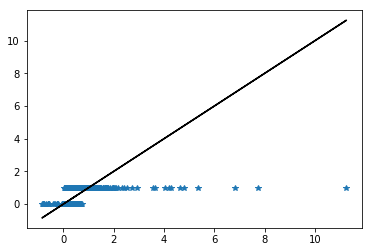

In [16]:
fit = polyfit(x, y, 1)
fit_fn = poly1d(fit)
plt.plot(x,y, '*', x, fit_fn(x), 'k')

plt.show()

Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)
y = Y_train 
X = X_train

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coefficients
[[-2.24000908e-04  3.38898845e-02  2.63818383e-04 -2.27788880e-02
  -1.74168757e-07 -2.14928107e-03]]
[-0.00081467]

 Accuracy by admission status
state      0      1
row_0              
0      94804  10808
1       3745  56374

 Percentage accuracy
0.9121890292099849


Lasso and Ridge 

In [19]:
# Your code here
# Small number of parameters.
lass = linear_model.Lasso(alpha=0.01)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))



R² for the model with few features:
0.0418354463281424


In [20]:
ridgeregr = linear_model.Ridge(alpha=1, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))


-0.021375392692000394


In [21]:

print(ridgeregr.score(X_test, Y_test))

-0.018565501475072743
